<a href="https://colab.research.google.com/github/Hellomaria-maker/NN_start/blob/main/NN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sequential** - это класс последовательности слоев в нейронной сети, у нас пока будет только один слой, но сюда можно добавлять сколь угодно слоев и это будет сеть, состоящая из последовательности слоев.

**Dense** - это класс полносвязного/линейного слоя, все нейроны связаны друг с другом.

**units=1**- это количество нейронов в слое. У нас 1 нейрон.

**input_shape=(1,)** - это входная размерность объекта. У нас только 1 вход.
activation='relu' - это функция активации, которая добавляет в слой нелинейности, именно из-за неё мы можем получать более сложные результаты работы сети.

In [1]:
from keras.layers import Dense
from keras.models import Sequential # значит сигнал последовательно идет от входа к выходу и нигде не зацыкливается, нет рекурсий

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
]) # в класс последовательности слоев передадим один полносвязный слой из одного нейрона и один вход 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.get_weights()

[array([[-0.9368861]], dtype=float32), array([0.], dtype=float32)]

In [4]:
# Если хотим зафиксировать веса
import tensorflow as tf
tf.random.set_seed(1)

model = Sequential([
    Dense(1, input_shape=(1,), activation='relu')
])

model.get_weights()

[array([[-1.1600207]], dtype=float32), array([0.], dtype=float32)]

# Нейрон для умножения на 3

In [5]:
# Обучающие данные
import numpy as np

X = np.array([[1], [3], [2], [10], [4], [7], [8]])
y = np.array([[3, 9, 6, 30, 12, 21, 24]]).T

In [6]:
# Архитектура сети - ондин слой, один нейрон
model = Sequential([
    Dense(1, input_shape=(1,), activation='linear') # линейная активация
])

model.summary() # веса два так как есть еще отклонение (bias)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
w1, w0 = model.get_weights()
w1,  # [вес при признаке],[bias]

(array([[0.03501177]], dtype=float32), array([0.], dtype=float32))

In [8]:
# предсказание модели для одного обьекта
model.predict(X[:1])

array([[0.03501177]], dtype=float32)

In [9]:
# что проиходит внутри predict
w1 * X[:1] + w0

from keras.activations import linear
linear(w1 * X[:1] + w0)

array([[0.03501177]])

## Оптимизация
Хотим оптимизировать (уменьшать) функцию потерь Mean Squared Error (MSE), метрика Mean Absolute Error (MAE)

In [11]:
# оптимизируем mse с помощью sgd 
model.compile(optimizer='sgd', loss='mse', metrics='mae') 

In [ ]:
%%time
model.fit(X, y, epochs=100)

In [13]:
# Как модель работает на новых данных:
user_inp1, user_inp2 = 5, -9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(model.predict(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 -9
Предсказание нейронной сети: 
[[ 15.066688]
 [-26.438816]]


In [14]:
# Как поменялись веса после обучения:
nw1, nw0 = model.get_weights()
print('w1 before', w1, 'w1 after', nw1)
print('w0 before', w0, 'w0 after', nw0)

w1 before [[0.03501177]] w1 after [[2.9646788]]
w0 before [0.] w0 after [0.2432937]


In [15]:
import pandas as pd

pd.DataFrame({
   'true': np.squeeze(y),
   'pred': np.squeeze(model.predict(X))
})

,true,pred
0,3,3.207973
1,9,9.137330
2,6,6.172651
3,30,29.890081
4,12,12.102009
5,21,20.996044
6,24,23.960724


# Сеть для классификации изображений

In [18]:
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)

y = X1 + X2

In [20]:
X = np.vstack([X1, X2]).T
# X
y = y[None]
y = y.T
# y

In [21]:
# Данные необходимо нормализовать
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

In [23]:
# Архитектура сети

tf.random.set_seed(9)

model = Sequential([
    Dense(3, input_shape=(2,), activation='linear'),
    Dense(1, activation='linear')
]) # два полносвязных слоя, линейные активации, два входа, три нейрона и один выход

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


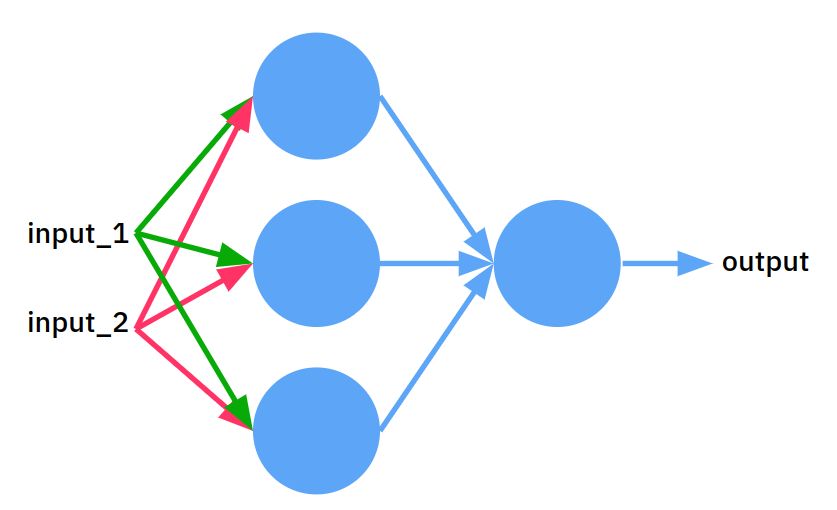

In [24]:
model.get_weights()

[array([[-0.07237196,  0.56556344,  0.43740094],
        [-0.5245885 ,  0.13245857, -0.5101871 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.8827321 ],
        [ 0.29002857],
        [ 0.37785316]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
# оптимизируем также MSE с помощью стохастического градиентного спуска

model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
%%time
model.fit(X_norm, y, epochs=200)

In [27]:
# проверяем на новых данных
test_X = [[4, 2],
          [6, 2]]
test_X = mms.transform(test_X)
print("Предсказание нейронной сети: ")
print(model.predict(np.array(test_X)))

Предсказание нейронной сети: 
[[6.0000315]
 [8.000014 ]]


In [28]:
# Проверяем на всех данных
pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'true': np.squeeze(y),
    'pred': np.squeeze(model.predict(X_norm))
}).head(10)

,x1,x2,true,pred
0,4,5,9,9.000020
1,5,3,8,8.000019
2,1,4,5,5.000051
3,1,9,10,10.000031
4,9,7,16,15.999969
5,9,1,10,9.999991
6,5,8,13,13.000001
7,8,4,12,11.999990
8,4,1,5,5.000035
9,7,4,11,10.999997


# Сеть для классификации изображений

In [41]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() # размеры картинок 28 на 28 писелей

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### Подготовка данных

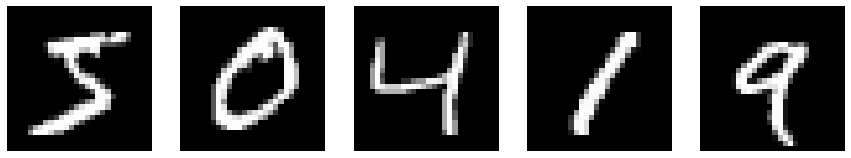

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [43]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
# оставим только значения 0 и 1 для бинарной классификации
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]
X_train = X_train[idxs]

idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[idxs]
X_test = X_test[idxs]

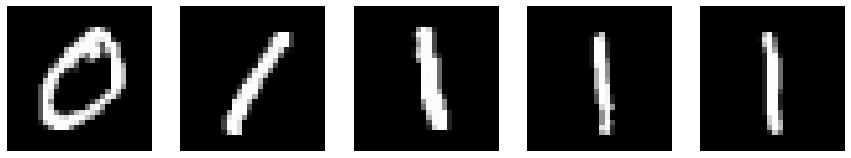

In [45]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [46]:
# изображения представлены пикселями в диапазоне от 0 до 255, а для нейросети комфортней обучаться на диапазоне от 0 до 1
print(X_train.min(), X_train.max())

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.min(), X_train.max())

0 255
0.0 1.0


In [47]:
y_train

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [48]:
# метку класса - 2 столбика, где первый - это метка является ли изображение 0 классом, а второй столбик - является ли изображение 1 классом
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

In [50]:
X_train[..., np.newaxis].shape

(12665, 28, 28, 1)

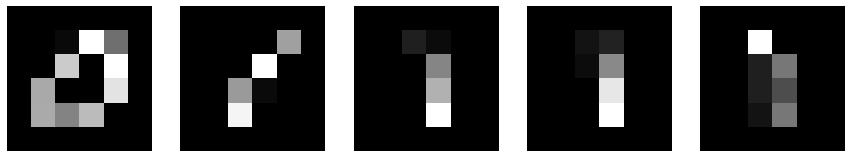

In [51]:
# снизить размер изображений для упрощения работы сети
import matplotlib.pyplot as plt


X_train_resized = tf.image.resize(X_train[..., np.newaxis], (6, 6))[..., 0]
X_test_resized = tf.image.resize(X_test[..., np.newaxis], (6, 6))[..., 0]

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train_resized[i], cmap='gray')
    ax[i].axis('off')

### Создание и обучение сети

In [52]:
# на вход поступает изображение 6х6, нужно с ним что-то сделать, так как наша сетку пока не умеет работать с двумерным входом. Здесь нам поможет слой из keras Flatten,
# который вытягивает изображение в один вектор, была картинка 6x6, а станет вектором с размерностью 36.

from keras.layers import Flatten
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(6, 6)),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 36)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 74        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


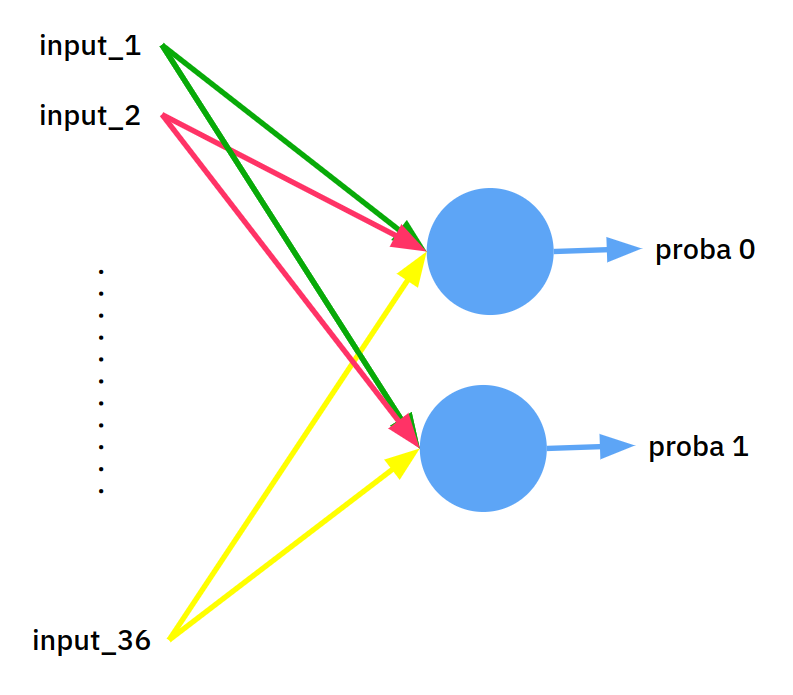

In [53]:
# оптимизируем binary_crossentropy при помоши sgd с метрикой accuracy
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

In [54]:
%%time
model.fit(X_train_resized, y_train_cat, epochs=5)

Epoch 1/5
396/396 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.8079
Epoch 2/5
396/396 [==============================] - 1s 1ms/step - loss: 0.4760 - accuracy: 0.9671
Epoch 3/5
396/396 [==============================] - 1s 1ms/step - loss: 0.3888 - accuracy: 0.9747
Epoch 4/5
396/396 [==============================] - 1s 1ms/step - loss: 0.3318 - accuracy: 0.9765
Epoch 5/5
396/396 [==============================] - 1s 1ms/step - loss: 0.2918 - accuracy: 0.9768
CPU times: user 3.7 s, sys: 222 ms, total: 3.92 s
Wall time: 5.6 s


In [55]:
print("Предсказание нейронной сети: ")
pred = model.predict(X_test_resized[:1])
pred # две вероятности для двух классов

Предсказание нейронной сети: 


array([[0.23196417, 0.779374  ]], dtype=float32)

In [56]:
# индекс класса с максимальной вероятностью
pred_cls = pred.argmax()
pred_cls

1

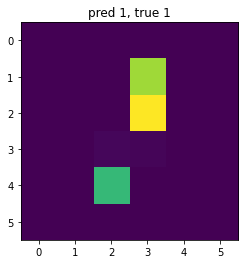

In [57]:
idx = 0
plt.imshow(X_test_resized[idx])
plt.title(f'pred {pred_cls}, true {y_test[idx]}');

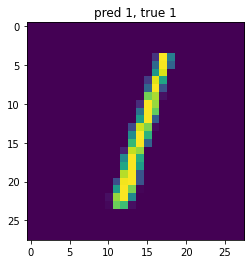

In [58]:
plt.imshow(X_test[idx])
plt.title(f'pred {pred_cls}, true {y_test[idx]}');

In [59]:
preds = model.predict(X_test_resized)
preds

array([[0.23196417, 0.779374  ],
       [0.87699807, 0.13391578],
       [0.2039651 , 0.8257028 ],
       ...,
       [0.23160627, 0.8456099 ],
       [0.8840015 , 0.19852799],
       [0.19147992, 0.83787894]], dtype=float32)

In [60]:
preds_cls = preds.argmax(axis=1)
preds_cls

array([1, 0, 1, ..., 1, 0, 1])

In [61]:
from sklearn.metrics import accuracy_score

print(f'test acc: {accuracy_score(y_test, preds_cls)*100:.2f}% ({(y_test == preds_cls).sum()} out of {y_test.shape[0]})')

test acc: 98.25% (2078 out of 2115)
